In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Імпортуєм потрібний датасет
df = pd.read_csv('data.csv')
df

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,24000,10.49,779.95,B,3 years,MORTGAGE,89000.0,Fully Paid,21.12,1.0,...,78.0,0.00,0.000,16901.45,1.0,Individual,0.0,0.0,70116.0,43670.0
1,15000,21.49,409.95,D,NaN,RENT,38251.2,Charged Off,30.98,0.0,...,0.0,1614.60,145.314,409.95,1.0,Individual,0.0,273.0,31306.0,21600.0
2,24000,6.97,740.73,A,2 years,MORTGAGE,92000.0,Fully Paid,16.57,0.0,...,0.0,0.00,0.000,12074.88,0.0,Individual,0.0,0.0,196318.0,68900.0
3,6500,19.22,238.99,D,4 years,MORTGAGE,25000.0,Charged Off,9.70,0.0,...,15.0,127.05,22.869,238.99,0.0,Individual,0.0,0.0,6848.0,16700.0
4,20000,11.22,656.86,B,10+ years,OWN,58000.0,Fully Paid,16.59,0.0,...,0.0,0.00,0.000,20101.30,0.0,Individual,0.0,0.0,426287.0,26100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,26000,14.08,606.06,C,10+ years,MORTGAGE,80000.0,Fully Paid,8.62,0.0,...,0.0,0.00,0.000,26244.05,0.0,Individual,0.0,4812.0,110260.0,20600.0
19496,3000,12.74,100.71,C,10+ years,MORTGAGE,109000.0,Fully Paid,34.29,1.0,...,0.0,0.00,0.000,2978.46,0.0,Individual,0.0,0.0,260585.0,46600.0
19497,17000,11.12,557.53,B,7 years,MORTGAGE,75000.0,Fully Paid,20.77,0.0,...,0.0,0.00,0.000,2785.60,0.0,Individual,0.0,NaN,NaN,NaN
19498,30000,8.18,942.59,B,7 years,RENT,175000.0,Fully Paid,7.19,2.0,...,0.0,0.00,0.000,3.80,0.0,Individual,0.0,0.0,88348.0,48000.0


In [3]:
# Інформація про дата сет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   19500 non-null  int64  
 1   int_rate                    19500 non-null  float64
 2   installment                 19500 non-null  float64
 3   grade                       19500 non-null  object 
 4   emp_length                  18281 non-null  object 
 5   home_ownership              19500 non-null  object 
 6   annual_inc                  19500 non-null  float64
 7   loan_status                 19500 non-null  object 
 8   dti                         19495 non-null  float64
 9   delinq_2yrs                 19500 non-null  float64
 10  inq_last_6mths              19500 non-null  float64
 11  mths_since_last_delinq      9868 non-null   float64
 12  open_acc                    19500 non-null  float64
 13  pub_rec                     195

In [4]:
# Перевіряємо чи є неповні дані у датасеті
df.isna().sum()

loan_amnt                        0
int_rate                         0
installment                      0
grade                            0
emp_length                    1219
home_ownership                   0
annual_inc                       0
loan_status                      0
dti                              5
delinq_2yrs                      0
inq_last_6mths                   0
mths_since_last_delinq        9632
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      14
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med       0
application_type                 0
acc_now_delinq                   0
tot_coll_amt        

In [5]:
# Розділяєм ознаки на числові і категоріальні
text_features = [i for i in df.columns if type(df[i][0]) == str]
nums_features = [i for i in df.columns if i not in text_features]

<Axes: >

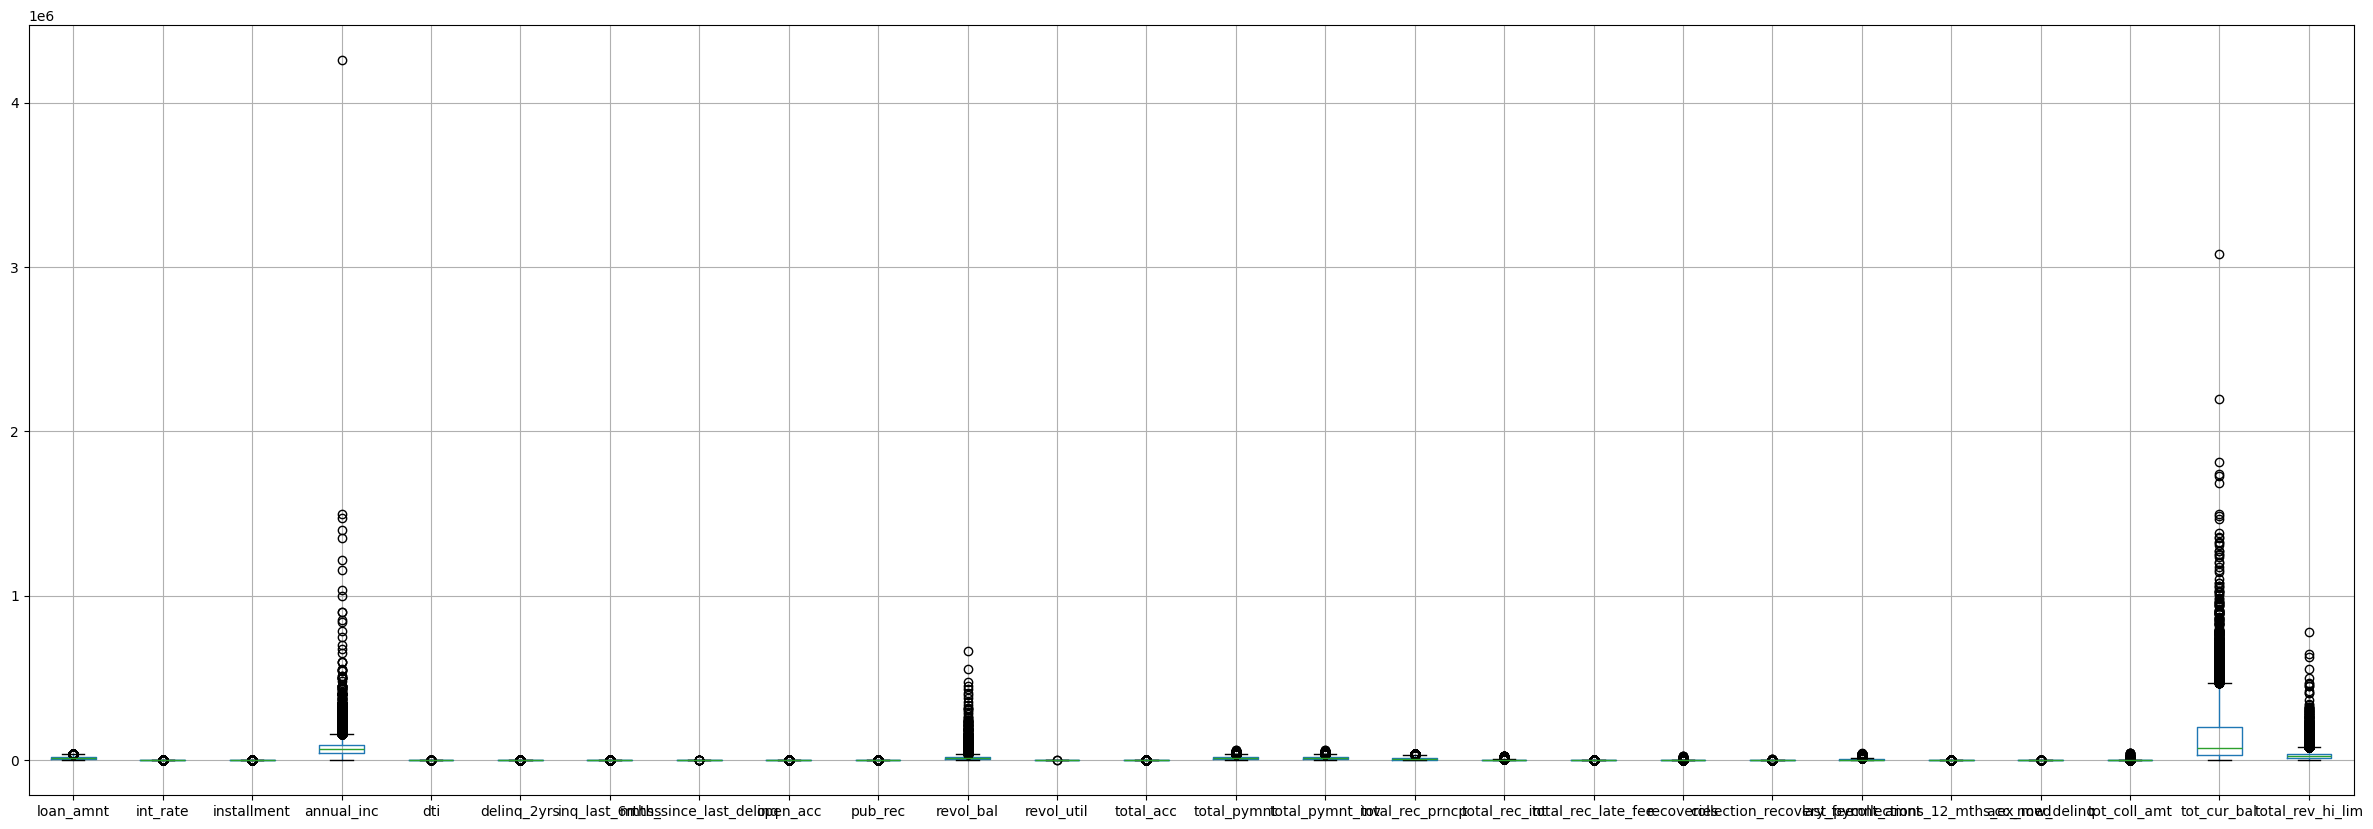

In [6]:
# візуалізуємо outliers
df.boxplot(figsize=(30,10))

### Завдання 2

In [7]:


# створюємо цільову змінну
loan_stat = [i for i in df['loan_status']]
loan_stat_num = []
for i in loan_stat:
    if i == 'Charged Off':
        loan_stat_num.append(1)
    else:
        loan_stat_num.append(0)
    
df['y_reg'] = loan_stat_num

In [8]:
# Розглянемо кореляцію  цільвої змінної і числових ознак
plt.figure(figsize=(25,25))
sns.heatmap(df.corr( numeric_only=True ),annot=True,cmap="crest")

<Axes: >

In [9]:
sns.scatterplot(x = 'y_reg', y = 'recoveries' , data = df)

<Axes: xlabel='y_reg', ylabel='recoveries'>

In [10]:
#розпреділення цільової змінної
sns.histplot(df,x='y_reg',color='#abcdef')

<Axes: xlabel='y_reg', ylabel='recoveries'>

In [11]:

# Приводим всі колонки дата фрейму до числового вигляду за допомогою OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder


columns_ohe = make_column_transformer(
    ( OneHotEncoder(handle_unknown='ignore',sparse_output=False) , text_features),
    remainder = 'passthrough'
).set_output(transform='pandas')


In [12]:
# Отримуємо навчальну вибірку яка повністю складений з  ознак у числовому вигляді
df_ohe = columns_ohe.fit_transform(df)
df_ohe = df_ohe.drop(columns=['onehotencoder__home_ownership_ANY','onehotencoder__home_ownership_OTHER',       'onehotencoder__loan_status_Charged Off',
       'onehotencoder__loan_status_Fully Paid',
       'onehotencoder__loan_status_In Grace Period',
       'onehotencoder__loan_status_Late (16-30 days)',
       'onehotencoder__loan_status_Late (31-120 days)','remainder__y_reg'])
df_ohe


,onehotencoder__grade_A,onehotencoder__grade_B,onehotencoder__grade_C,onehotencoder__grade_D,onehotencoder__grade_E,onehotencoder__grade_F,onehotencoder__grade_G,onehotencoder__emp_length_1 year,onehotencoder__emp_length_10+ years,onehotencoder__emp_length_2 years,...,remainder__total_rec_int,remainder__total_rec_late_fee,remainder__recoveries,remainder__collection_recovery_fee,remainder__last_pymnt_amnt,remainder__collections_12_mths_ex_med,remainder__acc_now_delinq,remainder__tot_coll_amt,remainder__tot_cur_bal,remainder__total_rev_hi_lim
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3359.33,78.0,0.00,0.000,16901.45,1.0,0.0,0.0,70116.0,43670.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5302.70,0.0,1614.60,145.314,409.95,1.0,0.0,273.0,31306.0,21600.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2148.75,0.0,0.00,0.000,12074.88,0.0,0.0,0.0,196318.0,68900.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2109.37,15.0,127.05,22.869,238.99,0.0,0.0,0.0,6848.0,16700.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,88.83,0.0,0.00,0.000,20101.30,0.0,0.0,0.0,426287.0,26100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,223.71,0.0,0.00,0.000,26244.05,0.0,0.0,4812.0,110260.0,20600.0
19496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,77.05,0.0,0.00,0.000,2978.46,0.0,0.0,0.0,260585.0,46600.0
19497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3020.67,0.0,0.00,0.000,2785.60,0.0,0.0,NaN,NaN,NaN
19498,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3909.77,0.0,0.00,0.000,3.80,0.0,0.0,0.0,88348.0,48000.0


In [13]:

#  навчальна  вибірка з числових ознак
X_num = df[nums_features]
y = (df['y_reg'])
X_num.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,19500.000000,19500.000000,19500.000000,1.950000e+04,19495.000000,19500.000000,19500.000000,9868.000000,19500.000000,19500.000000,...,19500.000000,19500.000000,19500.000000,19500.000000,19500.000000,19500.000000,19500.000000,18630.000000,1.863000e+04,18630.000000
mean,14821.008974,13.906393,448.408998,7.580852e+04,18.597095,0.330769,0.664000,34.047021,11.602462,0.225333,...,2545.939345,3.826898,298.539651,50.258535,4140.196449,0.018256,0.005077,222.111541,1.361425e+05,31819.256200
std,8838.026964,4.963300,265.330204,6.233493e+04,9.534863,0.879724,0.942594,21.996481,5.569023,0.628808,...,2746.267537,20.841700,1074.575286,190.363170,6461.795339,0.145975,0.074594,1443.977110,1.535275e+05,31987.610385
min,500.000000,5.310000,16.310000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,8000.000000,10.490000,257.880000,4.500000e+04,12.030000,0.000000,0.000000,15.000000,8.000000,0.000000,...,806.397500,0.000000,0.000000,0.000000,332.712500,0.000000,0.000000,0.000000,2.841575e+04,13700.000000
50%,12775.000000,13.350000,381.060000,6.500000e+04,17.980000,0.000000,0.000000,30.000000,11.000000,0.000000,...,1650.570000,0.000000,0.000000,0.000000,749.375000,0.000000,0.000000,0.000000,7.321900e+04,23500.000000
75%,20000.000000,16.990000,593.490000,9.000000e+04,24.590000,0.000000,1.000000,50.000000,14.000000,0.000000,...,3231.047500,0.000000,0.000000,0.000000,5795.580000,0.000000,0.000000,0.000000,2.038738e+05,39600.000000
max,40000.000000,30.990000,1546.520000,4.260016e+06,325.990000,16.000000,7.000000,135.000000,75.000000,28.000000,...,26822.380000,768.170000,26708.310000,4807.495800,40604.210000,4.000000,2.000000,44169.000000,3.078704e+06,778500.000000


In [14]:
# Працюєм з неповними данними
from sklearn.impute import SimpleImputer

X_ohe_mean_strategy = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df_ohe))
X_ohe_median_strategy = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df_ohe))
X_ohe_mode_strategy = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(df_ohe))
X_ohe_constant_strategy = pd.DataFrame(SimpleImputer(strategy='constant').fit_transform(df_ohe))


X_num_mean_strategy = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_num))
X_num_median_strategy = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X_num))
X_num_mode_strategy = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(X_num))
X_num_constant_strategy = pd.DataFrame(SimpleImputer(strategy='constant').fit_transform(X_num))

### LINEAR MODELS

In [15]:

#  Лінійна регресія по числових ознаках з simple imputer stragegy = mean
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_num_mean_for_train , X_num_mean_for_validation , y_num_for_train , y_num_for_validation = train_test_split(X_num_mean_strategy,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_num_mean_for_train = QuantileTransformer().fit_transform(X_num_mean_for_train)
X_num_mean_for_validation = QuantileTransformer().fit_transform(X_num_mean_for_validation)


pd.DataFrame(X_num_mean_for_train,columns=X_num.columns).describe()


# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X_num_mean_linear_regression = LinearRegression().fit(X_num_mean_for_train,y_num_for_train)
X_num_mean_linear_regression_score = r2_score(y_num_for_validation,X_num_mean_linear_regression.predict(X_num_mean_for_validation))

In [16]:
#  Лінійна регресія по числових ознаках з simple imputer stragegy = median
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_num_median_for_train , X_num_median_for_validation , y_num_for_train , y_num_for_validation = train_test_split(X_num_median_strategy,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_num_median_for_train = QuantileTransformer().fit_transform(X_num_median_for_train)
X_num_median_for_validation = QuantileTransformer().fit_transform(X_num_median_for_validation)


pd.DataFrame(X_num_median_for_train,columns=X_num.columns).describe()


# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X_num_median_linear_regression = LinearRegression().fit(X_num_median_for_train,y_num_for_train)
X_num_median_linear_regression_score = r2_score(y_num_for_validation,X_num_median_linear_regression.predict(X_num_median_for_validation))

In [17]:
#  Лінійна регресія по числових ознаках з simple imputer stragegy = most_Frequent
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_num_mode_for_train , X_num_mode_for_validation , y_num_for_train , y_num_for_validation = train_test_split(X_num_mode_strategy,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_num_mode_for_train = QuantileTransformer().fit_transform(X_num_mode_for_train)
X_num_mode_for_validation = QuantileTransformer().fit_transform(X_num_mode_for_validation)


pd.DataFrame(X_num_mode_for_train,columns=X_num.columns).describe()


# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X_num_mode_linear_regression = LinearRegression().fit(X_num_mode_for_train,y_num_for_train)
X_num_mode_linear_regression_score = r2_score(y_num_for_validation,X_num_mode_linear_regression.predict(X_num_mode_for_validation))

In [18]:
#  Лінійна регресія по числових ознаках з simple imputer stragegy = constant
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_num_constant_for_train , X_num_constant_for_validation , y_num_for_train , y_num_for_validation = train_test_split(X_num_constant_strategy,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_num_constant_for_train = QuantileTransformer().fit_transform(X_num_constant_for_train)
X_num_constant_for_validation = QuantileTransformer().fit_transform(X_num_constant_for_validation)


pd.DataFrame(X_num_constant_for_train,columns=X_num.columns).describe()


# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X_num_constant_linear_regression = LinearRegression().fit(X_num_constant_for_train,y_num_for_train)
X_num_constant_linear_regression_score = r2_score(y_num_for_validation,X_num_constant_linear_regression.predict(X_num_constant_for_validation))

In [19]:
####

In [20]:

#  Лінійна регресія по числових ознаках з simple imputer stragegy = mean
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_ohe_mean_for_train , X_ohe_mean_for_validation , y_ohe_for_train , y_ohe_for_validation = train_test_split(X_ohe_mean_strategy,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_ohe_mean_for_train = QuantileTransformer().fit_transform(X_ohe_mean_for_train)
X_ohe_mean_for_validation = QuantileTransformer().fit_transform(X_ohe_mean_for_validation)





# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X_ohe_mean_linear_regression = LinearRegression().fit(X_ohe_mean_for_train,y_ohe_for_train)
X_ohe_mean_linear_regression_score = r2_score(y_ohe_for_validation,X_ohe_mean_linear_regression.predict(X_ohe_mean_for_validation))

In [21]:

#  Лінійна регресія по числових ознаках з simple imputer stragegy = mean
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_ohe_median_for_train , X_ohe_median_for_validation , y_ohe_for_train , y_ohe_for_validation = train_test_split(X_ohe_median_strategy,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_ohe_median_for_train = QuantileTransformer().fit_transform(X_ohe_median_for_train)
X_ohe_median_for_validation = QuantileTransformer().fit_transform(X_ohe_median_for_validation)





# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X_ohe_median_linear_regression = LinearRegression().fit(X_ohe_median_for_train,y_ohe_for_train)
X_ohe_median_linear_regression_score = r2_score(y_ohe_for_validation,X_ohe_median_linear_regression.predict(X_ohe_median_for_validation))

In [22]:

#  Лінійна регресія по числових ознаках з simple imputer stragegy = mean
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_ohe_mode_for_train , X_ohe_mode_for_validation , y_ohe_for_train , y_ohe_for_validation = train_test_split(X_ohe_mode_strategy,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_ohe_mode_for_train = QuantileTransformer().fit_transform(X_ohe_mode_for_train)
X_ohe_mode_for_validation = QuantileTransformer().fit_transform(X_ohe_mode_for_validation)





# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X_ohe_mode_linear_regression = LinearRegression().fit(X_ohe_mode_for_train,y_ohe_for_train)
X_ohe_mode_linear_regression_score = r2_score(y_ohe_for_validation,X_ohe_mode_linear_regression.predict(X_ohe_mode_for_validation))

In [23]:

#  Лінійна регресія по числових ознаках з simple imputer stragegy = mean
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_ohe_constant_for_train , X_ohe_constant_for_validation , y_ohe_for_train , y_ohe_for_validation = train_test_split(X_ohe_constant_strategy,y,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_ohe_constant_for_train = QuantileTransformer().fit_transform(X_ohe_constant_for_train)
X_ohe_constant_for_validation = QuantileTransformer().fit_transform(X_ohe_constant_for_validation)





# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X_ohe_constant_linear_regression = LinearRegression().fit(X_ohe_constant_for_train,y_ohe_for_train)
X_ohe_constant_linear_regression_score = r2_score(y_ohe_for_validation,X_ohe_constant_linear_regression.predict(X_ohe_constant_for_validation))

### LASSO MODELS

In [24]:
# Lassoes по Вибірці з виключно числових ознак
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


params = [0.0001,0.001,0.01,0.1,1,10,100,100]
cv = 3

Lassoes_X_num_mean = GridSearchCV(
    estimator = Lasso(),
    param_grid = {'alpha': params,'selection':['cyclic', 'random']},
    cv = cv,
    n_jobs = -1,
).fit(X_num_mean_for_train,y_num_for_train)


Lassoes_X_num_mean_cv_result = pd.DataFrame(Lassoes_X_num_mean.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])


#з Lasso найкращим коефіцієнтом детермінації 
Lasso_X_num_mean = Lassoes_X_num_mean.best_estimator_


# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Lasso_X_num_mean_score = r2_score(y_num_for_validation,(Lasso_X_num_mean.predict(X_num_mean_for_validation)))


Lasso_X_num_mean_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.725e+01, tolerance: 1.701e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.563e-01, tolerance: 1.719e-01
  model = cd_fast.enet_coordinate_descent(


0.696036743905864

In [25]:
# Lassoes по Вибірці з виключно числових ознак
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


params = [0.0001,0.001,0.01,0.1,1,10,100,100]
cv = 3

Lassoes_X_num_median = GridSearchCV(
    estimator = Lasso(),
    param_grid = {'alpha': params,'selection':['cyclic', 'random']},
    cv = cv,
    n_jobs = -1,
).fit(X_num_median_for_train,y_num_for_train)


Lassoes_X_num_median_cv_result = pd.DataFrame(Lassoes_X_num_median.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])


#з Lasso найкращим коефіцієнтом детермінації 
Lasso_X_num_median = Lassoes_X_num_median.best_estimator_


# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Lasso_X_num_median_score = r2_score(y_num_for_validation,(Lasso_X_num_median.predict(X_num_median_for_validation)))


Lasso_X_num_median_score

0.696067714365699

In [26]:
# Lassoes по Вибірці з виключно числових ознак
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


params = [0.0001,0.001,0.01,0.1,1,10,100,100]
cv = 3

Lassoes_X_num_mode = GridSearchCV(
    estimator = Lasso(),
    param_grid = {'alpha': params,'selection':['cyclic', 'random']},
    cv = cv,
    n_jobs = -1,
).fit(X_num_mode_for_train,y_num_for_train)


Lassoes_X_num_mode_cv_result = pd.DataFrame(Lassoes_X_num_mode.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])


#з Lasso найкращим коефіцієнтом детермінації 
Lasso_X_num_mode = Lassoes_X_num_mode.best_estimator_


# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Lasso_X_num_mode_score = r2_score(y_num_for_validation,(Lasso_X_num_mode.predict(X_num_mode_for_validation)))


Lasso_X_num_mode_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.358e+00, tolerance: 1.752e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+01, tolerance: 1.719e-01
  model = cd_fast.enet_coordinate_descent(


0.6959955182346136

In [27]:
# Lassoes по Вибірці з виключно числових ознак
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


params = [0.0001,0.001,0.01,0.1,1,10,100,100]
cv = 3

Lassoes_X_num_constant = GridSearchCV(
    estimator = Lasso(),
    param_grid = {'alpha': params,'selection':['cyclic', 'random']},
    cv = cv,
    n_jobs = -1,
).fit(X_num_constant_for_train,y_num_for_train)


Lassoes_X_num_constant_cv_result = pd.DataFrame(Lassoes_X_num_constant.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])


#з Lasso найкращим коефіцієнтом детермінації 
Lasso_X_num_constant = Lassoes_X_num_constant.best_estimator_


# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Lasso_X_num_constant_score = r2_score(y_num_for_validation,(Lasso_X_num_constant.predict(X_num_constant_for_validation)))


Lasso_X_num_constant_score

0.6959854110500094

In [28]:
# Lassoes по Вибірці з всіх ознак
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


params = [0.0001,0.001,0.01,0.1,1,10,100,100]
cv = 10

Lassoes_X_ohe_mode = GridSearchCV(
    estimator = Lasso(),
    param_grid = {'alpha': params,'selection':['cyclic', 'random']},
    cv = cv,
    n_jobs = -1,
).fit(X_ohe_mode_for_train,y_num_for_train)


Lassoes_X_ohe_mode_cv_result = pd.DataFrame(Lassoes_X_ohe_mode.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])


#з Lasso найкращим коефіцієнтом детермінації 
Lasso_X_ohe_mode = Lassoes_X_ohe_mode.best_estimator_


# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Lasso_X_ohe_mode_score = r2_score(y_num_for_validation,(Lasso_X_ohe_mode.predict(X_ohe_mode_for_validation)))


Lasso_X_ohe_mode_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.143e+00, tolerance: 2.334e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.310e+01, tolerance: 2.333e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

0.6982249841136848

### RIDGE MODELS

In [29]:
# Ridges по Вибірці з виключно числових ознак
from sklearn.linear_model import Ridge


Ridges_X_num = GridSearchCV(
    estimator = Ridge(),
    param_grid = {'alpha': params,'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']},
    cv = cv,
    n_jobs = -1,
).fit(X_num_mean_for_train,y_num_for_train)


Ridges_X_num_cv_result = pd.DataFrame(Ridges_X_num.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

#з Ridge найкращим коефіцієнтом детермінації 
Ridge_X_num = Ridges_X_num.best_estimator_

# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Ridge_X_num_score = r2_score(y_num_for_validation,(Ridge_X_num.predict(X_num_mean_for_validation)))


Ridge_X_num_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

0.6959963773395834

In [30]:
# Ridges по Вибірці з всіх ознак
from sklearn.linear_model import Ridge


Ridges_X_ohe = GridSearchCV(
    estimator = Ridge(),
    param_grid = {'alpha': params,'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']},
    cv = cv,
    n_jobs = -1,
).fit(X_ohe_mean_for_train,y_ohe_for_train)


Ridges_X_ohe_cv_result = pd.DataFrame(Ridges_X_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

#з Ridge найкращим коефіцієнтом детермінації 
Ridge_X_ohe = Ridges_X_ohe.best_estimator_

# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Ridge_X_ohe_score = r2_score(y_ohe_for_validation,(Ridge_X_ohe.predict(X_ohe_mean_for_validation)))


Ridge_X_ohe_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

0.6980748400840455

###  SVM Regressor

In [31]:
from sklearn.svm import SVR


SVR_X_num = GridSearchCV(
    estimator = SVR(),
    param_grid= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale','auto']},
    cv=cv,
    n_jobs=-1
).fit(X_num_mean_for_train,y_ohe_for_train)


SVR_X_num_cv_results = pd.DataFrame(SVR_X_num.cv_results_)

SVR_X_num = SVR_X_num.best_estimator_



SVR_X_num_score = r2_score(y_ohe_for_validation,SVR_X_num.predict(X_num_median_for_validation))


SVR_X_num_score

0.6733576913658925

In [32]:
from sklearn.svm import SVR


SVR_X_ohe = GridSearchCV(
    estimator = SVR(),
    param_grid= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale','auto']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


SVR_X_ohe_cv_results = pd.DataFrame(SVR_X_ohe.cv_results_)

SVR_X_ohe = SVR_X_ohe.best_estimator_



SVR_X_ohe_score = r2_score(y_ohe_for_validation,SVR_X_ohe.predict(X_ohe_median_for_validation))


SVR_X_ohe_score

0.6819577583276215

### KNN Regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor


KNR_X_num = GridSearchCV(
    estimator = KNeighborsRegressor(),
    param_grid= {'weights':['uniform', 'distance'],'algorithm':['ball_tree','auto','kd_tree','brute']},
    cv=cv,
    n_jobs=-1
).fit(X_num_mean_for_train,y_num_for_train)


KNR_X_num_cv_results = pd.DataFrame(KNR_X_num.cv_results_)

KNR_X_num = KNR_X_num.best_estimator_



KNR_X_num_score = r2_score(y_num_for_validation,KNR_X_num.predict(X_num_mean_for_validation))


KNR_X_num_score

0.6556133268406088

In [34]:
from sklearn.neighbors import KNeighborsRegressor


KNR_X_ohe = GridSearchCV(
    estimator = KNeighborsRegressor(),
    param_grid= {'weights':['uniform', 'distance'],'algorithm':['ball_tree','auto','kd_tree','brute']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


KNR_X_ohe_cv_results = pd.DataFrame(KNR_X_ohe.cv_results_)

KNR_X_ohe = KNR_X_ohe.best_estimator_



KNR_X_ohe_score = r2_score(y_ohe_for_validation,KNR_X_ohe.predict(X_ohe_mean_for_validation))


KNR_X_ohe_score

0.5907285286242656

### sklearn.tree.DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor


DTR_X_num = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid= {'max_features':['sqrt', 'log2'],'splitter':['random','best']},
    cv=cv,
    n_jobs=-1
).fit(X_num_mean_for_train,y_num_for_train)


DTR_X_num_cv_results = pd.DataFrame(DTR_X_num.cv_results_)

DTR_X_num = DTR_X_num.best_estimator_



DTR_X_num_score = r2_score(y_num_for_validation,DTR_X_num.predict(X_num_mean_for_validation))
DTR_X_num_score

0.47603320714409136

In [36]:
from sklearn.tree import DecisionTreeRegressor


DTR_X_ohe = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid= {'max_features':['sqrt', 'log2'],'splitter':['random','best']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


DTR_X_ohe_cv_results = pd.DataFrame(DTR_X_ohe.cv_results_)

DTR_X_ohe = DTR_X_ohe.best_estimator_



DTR_X_ohe_score = r2_score(y_ohe_for_validation,DTR_X_ohe.predict(X_ohe_mean_for_validation))
DTR_X_ohe_score

0.4265523632993513

### sklearn.ensemble.RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor


RFR_X_num = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid= {'criterion':['squared_error', 'absolute_error','friedman_mse','poisson'],'max_features':['sqrt','log2']},
    cv=3,
    n_jobs=-1
).fit(X_num_mean_for_train,y_num_for_train)


RFR_X_num_cv_results = pd.DataFrame(RFR_X_num.cv_results_)

RFR_X_num = RFR_X_num.best_estimator_



RFR_X_num_score = r2_score(y_num_for_validation,DTR_X_num.predict(X_num_mean_for_validation))
RFR_X_num_score

0.47603320714409136

In [38]:
from sklearn.ensemble import RandomForestRegressor


RFR_X_ohe = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid= {'criterion':['squared_error', 'absolute_error','friedman_mse','poisson'],'max_features':['sqrt','log2']},
    cv=3,
    n_jobs=-1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


RFR_X_ohe_cv_results = pd.DataFrame(RFR_X_ohe.cv_results_)

RFR_X_ohe = RFR_X_ohe.best_estimator_



RFR_X_ohe_score = r2_score(y_ohe_for_validation,DTR_X_ohe.predict(X_ohe_mean_for_validation))
RFR_X_ohe_score

0.4265523632993513

In [39]:
Models_num = [X_num_mean_linear_regression,X_num_median_linear_regression,X_num_mode_linear_regression,X_num_constant_linear_regression,Lasso_X_num_mean,Lasso_X_num_median,Lasso_X_num_mode,Lasso_X_num_constant,Ridge_X_num,SVR_X_num,KNR_X_num,DTR_X_num,RFR_X_num]
Models_ohe = [X_ohe_mean_linear_regression,X_ohe_median_linear_regression,X_ohe_mode_linear_regression,X_ohe_constant_linear_regression,Lasso_X_ohe_mode,Ridge_X_ohe,SVR_X_ohe,KNR_X_ohe,DTR_X_ohe,RFR_X_ohe]
Models = pd.DataFrame(data = {'Model_Name': ['X_num_mean_linear_regression','X_num_median_linear_regression','X_num_mode_linear_regression','X_num_constant_linear_regression','Lasso_X_num_mean','Lasso_X_num_median','Lasso_X_num_mode','Lasso_X_num_constant','Lasso_X_ohe_mode','Ridge_X_num','Ridge_X_ohe','SVR_X_num','SVR_X_ohe','KNR_X_num','KNR_X_ohe','DTR_X_num','DTR_X_ohe','RFR_X_num','RFR_X_ohe'],'Model':[X_num_mean_linear_regression,X_num_median_linear_regression,X_num_mode_linear_regression,X_num_constant_linear_regression,Lasso_X_num_mean,Lasso_X_num_median,Lasso_X_num_mode,Lasso_X_num_constant,Lasso_X_ohe_mode,Ridge_X_num,Ridge_X_ohe,SVR_X_num,SVR_X_ohe,KNR_X_num,KNR_X_ohe,DTR_X_num,DTR_X_ohe,RFR_X_num,RFR_X_ohe],'r2_score_on_X_for_validation':[X_num_mean_linear_regression_score,X_num_median_linear_regression_score,X_num_mode_linear_regression_score,X_num_constant_linear_regression_score,Lasso_X_num_mean_score,Lasso_X_num_median_score,Lasso_X_num_mode_score,Lasso_X_num_constant_score,Lasso_X_ohe_mode_score,Ridge_X_num_score,Ridge_X_ohe_score,SVR_X_num_score,SVR_X_ohe_score,KNR_X_num_score,KNR_X_ohe_score,DTR_X_num_score,DTR_X_ohe_score,RFR_X_num_score,RFR_X_ohe_score]})
optimal_model = Models[Models['r2_score_on_X_for_validation'] == Models['r2_score_on_X_for_validation'].values.max()]['Model'].values[0]
Models

,Model_Name,Model,r2_score_on_X_for_validation
0,X_num_mean_linear_regression,LinearRegression(),0.695997
1,X_num_median_linear_regression,LinearRegression(),0.696073
2,X_num_mode_linear_regression,LinearRegression(),0.696012
3,X_num_constant_linear_regression,LinearRegression(),0.695988
4,Lasso_X_num_mean,Lasso(alpha=0.0001),0.696037
5,Lasso_X_num_median,"Lasso(alpha=0.0001, selection='random')",0.696068
6,Lasso_X_num_mode,Lasso(alpha=0.0001),0.695996
7,Lasso_X_num_constant,Lasso(alpha=0.0001),0.695985
8,Lasso_X_ohe_mode,Lasso(alpha=0.0001),0.698225
9,Ridge_X_num,"Ridge(alpha=0.1, solver='lsqr')",0.695996


In [40]:
optimal_model

Lasso(alpha=0.0001)

In [41]:
# Імпортуємо DataFrame для зовнішнього оцінювання
test = pd.read_csv('predict.csv')


# Функція яка приведе зовнішній датасет до вигляду, який приймає рішаюча модель
def transform_test_data(model,test):
    
    
    if model in Models_num:
        test_X_num_mean_strategy = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(test[nums_features]))
        test = QuantileTransformer().fit_transform(test_X_num_mean_strategy)
        prediction = model.predict(test)
        return prediction
    
    
    else:
        from sklearn.compose import make_column_transformer
        from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

        text_features_test = [i for i in test.columns if type(test[i][0]) == str]
        nums_features_test = [i for i in test.columns if i not in text_features]
        columns_ohe_test = make_column_transformer(
            ( OneHotEncoder(handle_unknown='ignore',sparse_output=False) ,text_features_test),
            remainder = 'passthrough'
        ).set_output(transform='pandas')
        test = columns_ohe_test.fit_transform(test)
        test = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(test))
        test = QuantileTransformer().fit_transform(test)
        prediction = model.predict(test)
        return prediction


best_reg_model_predictions =  transform_test_data(optimal_model,test)



pd.Series(best_reg_model_predictions).to_csv('predictions_reg.csv')


### Висновок задача регресіі
 Модель(з відповідними парамптрами) збережена у змінну optimal модель , має найкращий R2-score на відкладеній вибірці, а одже і є найкращою моделлю для вирішення задачі регресії.

### Завдання 6

# Logistic Regressions

In [42]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


cv = 3
LogisticRegression = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['l1','l2','elasticnet'] , 'C' : np.logspace(-4,4,5), 'solver' : ['saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_num_mean_for_train,y_num_for_train)


LogisticRegression_X_num = pd.DataFrame(LogisticRegression.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

LogisticRegression_num_best_model = LogisticRegression.best_estimator_
print(f'Accuracy для найкращої моделі з на відкладеній вибірці: {accuracy_score(y_num_for_validation,LogisticRegression_num_best_model.predict(X_num_mean_for_validation))}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Accuracy для найкращої моделі з на відкладеній вибірці: 0.9196581196581196


In [43]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


cv = 3
LogisticRegression_ohe = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['l1','l2','elasticnet'] , 'C' : np.logspace(-4,4,5), 'solver' : ['saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


LogisticRegression_X_ohe = pd.DataFrame(LogisticRegression_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

LogisticRegression_ohe_best_model = LogisticRegression_ohe.best_estimator_
print(f'Accuracy для найкращої моделі з на відкладеній вибірці: {accuracy_score(y_ohe_for_validation,LogisticRegression_ohe_best_model.predict(X_ohe_mean_for_validation))}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Accuracy для найкращої моделі з на відкладеній вибірці: 0.9196581196581196


### SVC

In [44]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
SVC_X_num = GridSearchCV(
    estimator = SVC(),
    param_grid= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale','auto']},
    cv=cv,
    n_jobs=-1
).fit(X_num_mean_for_train,y_num_for_train)


SVC_X_num_cv_results = pd.DataFrame(SVC_X_num.cv_results_)

SVC_X_num = SVC_X_num.best_estimator_



SVC_X_num_score = accuracy_score(y_num_for_validation,SVC_X_num.predict(X_num_median_for_validation))


SVC_X_num_score

0.9188034188034188

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVC_X_ohe = GridSearchCV(
    estimator = SVC(),
    param_grid= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale','auto']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


SVC_X_ohe_cv_results = pd.DataFrame(SVC_X_ohe.cv_results_)

SVC_X_ohe = SVC_X_ohe.best_estimator_



SVC_X_ohe_score = accuracy_score(y_ohe_for_validation,SVC_X_ohe.predict(X_ohe_median_for_validation))


SVC_X_ohe_score

0.9218803418803418

### KNC

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNC_X_ohe = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid= {'weights':['uniform', 'distance'],'algorithm':['ball_tree','auto','kd_tree','brute']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


KNC_X_ohe_cv_results = pd.DataFrame(KNC_X_ohe.cv_results_)

KNC_X_ohe = KNC_X_ohe.best_estimator_



KNC_X_ohe_score = accuracy_score(y_ohe_for_validation,KNC_X_ohe.predict(X_ohe_mean_for_validation))


KNC_X_ohe_score

0.9025641025641026

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNC_X_num = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid= {'weights':['uniform', 'distance'],'algorithm':['ball_tree','auto','kd_tree','brute']},
    cv=cv,
    n_jobs=-1
).fit(X_num_mean_for_train,y_num_for_train)


KNC_X_num_cv_results = pd.DataFrame(KNC_X_num.cv_results_)

KNC_X_num = KNC_X_num.best_estimator_



KNC_X_num_score = accuracy_score(y_num_for_validation,KNC_X_num.predict(X_num_mean_for_validation))


KNC_X_num_score

0.9092307692307692

### DTC

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DTC_X_ohe = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid= {'splitter':['gini', 'entropy','log_loss'],'splitter':['best','random'],'max_features':['sqrt','log2']},
    cv=3,
    n_jobs=-1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


DTC_X_ohe_cv_results = pd.DataFrame(DTC_X_ohe.cv_results_)

DTC_X_ohe = DTC_X_ohe.best_estimator_



DTC_X_ohe_score = accuracy_score(y_ohe_for_validation,DTC_X_ohe.predict(X_ohe_mean_for_validation))
DTC_X_ohe_score

0.8941880341880342

In [49]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
DTC_X_num = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid= {'splitter':['gini', 'entropy','log_loss'],'splitter':['best','random'],'max_features':['sqrt','log2']},
    cv=cv,
    n_jobs=-1
).fit(X_num_mean_for_train,y_num_for_train)


DTC_X_num_cv_results = pd.DataFrame(DTC_X_num.cv_results_)

DTC_X_num = DTC_X_num.best_estimator_



DTC_X_num_score = accuracy_score(y_num_for_validation,DTC_X_num.predict(X_num_mean_for_validation))
DTC_X_num_score

0.8984615384615384

### sklearn.ensemble.RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC_X_num = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid= {'criterion':['gini', 'entropy','log_loss'],'max_features':['sqrt','log2']},
    cv=3,
    n_jobs=-1
).fit(X_num_mean_for_train,y_num_for_train)


RFC_X_num_cv_results = pd.DataFrame(RFC_X_num.cv_results_)

RFC_X_num = RFC_X_num.best_estimator_



RFC_X_num_score = accuracy_score(y_num_for_validation,RFC_X_num.predict(X_num_mean_for_validation))
RFC_X_num_score

0.9206837606837607

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFC_X_ohe = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid= {'criterion':['gini', 'entropy','log_loss'],'max_features':['sqrt','log2']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_mean_for_train,y_ohe_for_train)


RFC_X_ohe_cv_results = pd.DataFrame(RFC_X_ohe.cv_results_)

RFC_X_ohe = RFC_X_ohe.best_estimator_



RFC_X_ohe_score = accuracy_score(y_ohe_for_validation,RFC_X_ohe.predict(X_ohe_mean_for_validation))
RFC_X_ohe_score

0.9225641025641026

In [52]:
Models_task_6 = pd.DataFrame(data = {'Model_Name': ['LogisticRegression_num_best_model','LogisticRegression_ohe_best_model','SVC_X_num','SVC_X_ohe','KNC_X_num','KNC_X_ohe','DTC_X_num','DTC_X_ohe','RFC_X_num','RFC_X_ohe'],'Model':[LogisticRegression_num_best_model,LogisticRegression_ohe_best_model,SVC_X_num,SVC_X_ohe,KNC_X_num,KNC_X_ohe,DTC_X_num,DTC_X_ohe,RFC_X_num,RFC_X_ohe],'Accuracy':[accuracy_score(y_num_for_validation,LogisticRegression_num_best_model.predict(X_num_mean_for_validation)),accuracy_score(y_ohe_for_validation,LogisticRegression_ohe_best_model.predict(X_ohe_mean_for_validation)),SVC_X_num_score,SVC_X_ohe_score,KNC_X_num_score,KNC_X_ohe_score,DTC_X_num_score,DTC_X_ohe_score,RFC_X_num_score,RFC_X_ohe_score]})
Models_task_6

,Model_Name,Model,Accuracy
0,LogisticRegression_num_best_model,"LogisticRegression(C=0.01, penalty='l1', solve...",0.919658
1,LogisticRegression_ohe_best_model,"LogisticRegression(C=0.01, penalty='l1', solve...",0.919658
2,SVC_X_num,SVC(kernel='poly'),0.918803
3,SVC_X_ohe,SVC(kernel='poly'),0.921880
4,KNC_X_num,"KNeighborsClassifier(algorithm='ball_tree', we...",0.909231
5,KNC_X_ohe,"KNeighborsClassifier(algorithm='ball_tree', we...",0.902564
6,DTC_X_num,DecisionTreeClassifier(max_features='sqrt'),0.898462
7,DTC_X_ohe,DecisionTreeClassifier(max_features='sqrt'),0.894188
8,RFC_X_num,"(DecisionTreeClassifier(criterion='entropy', m...",0.920684
9,RFC_X_ohe,"(DecisionTreeClassifier(criterion='log_loss', ...",0.922564


In [53]:
data = []
def heigher_accurace_model(model_num,model_ohe):
    if accuracy_score(y_num_for_validation,model_num.predict(X_num_mean_for_validation)) >= accuracy_score(y_ohe_for_validation,model_ohe.predict(X_ohe_mean_for_validation)):
        return [y_num_for_validation,X_num_mean_for_validation,model_num]
    else:
        return [y_ohe_for_validation,X_ohe_mean_for_validation,model_ohe]

k = heigher_accurace_model(SVC_X_num,SVC_X_ohe)

        

#### Logistic Regression metrics

In [54]:
model = heigher_accurace_model(LogisticRegression_num_best_model,LogisticRegression_ohe_best_model)
from sklearn.metrics import classification_report

rep = classification_report(model[0],model[2].predict(model[1]))
print(rep)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4316
           1       1.00      0.69      0.82      1534

    accuracy                           0.92      5850
   macro avg       0.95      0.85      0.88      5850
weighted avg       0.93      0.92      0.91      5850



In [55]:
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(model[0], model[2].decision_function(model[1]))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [56]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(model[0], model[2].decision_function(model[1]))
PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### SVC Metrics

In [57]:

model = heigher_accurace_model(SVC_X_num,SVC_X_ohe)
from sklearn.metrics import classification_report
rep = classification_report(model[0],model[2].predict(model[1]))
print(rep)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4316
           1       0.98      0.72      0.83      1534

    accuracy                           0.92      5850
   macro avg       0.94      0.86      0.89      5850
weighted avg       0.93      0.92      0.92      5850



In [58]:
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(model[0], model[2].decision_function(model[1]))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [59]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(model[0], model[2].decision_function(model[1]))
PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### KNC Metrics

In [60]:
model = heigher_accurace_model(KNC_X_num,KNC_X_ohe)
from sklearn.metrics import classification_report
rep = classification_report(model[0],model[2].predict(model[1]))
print(rep)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4316
           1       0.90      0.74      0.81      1534

    accuracy                           0.91      5850
   macro avg       0.91      0.85      0.88      5850
weighted avg       0.91      0.91      0.91      5850



In [61]:
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(model[0], model[2].predict_proba(model[1])[:,1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [62]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(model[0], model[2].predict_proba(model[1])[:,1])
PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### DTC Metrics

In [63]:
model = heigher_accurace_model(DTC_X_num,DTC_X_ohe)
from sklearn.metrics import classification_report
rep = classification_report(model[0],model[2].predict(model[1]))
print(rep)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4316
           1       0.81      0.80      0.81      1534

    accuracy                           0.90      5850
   macro avg       0.87      0.87      0.87      5850
weighted avg       0.90      0.90      0.90      5850



In [64]:
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(model[0], model[2].predict_proba(model[1])[:,1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [65]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(model[0], model[2].predict_proba(model[1])[:,1])
PrecisionRecallDisplay(precision=prec, recall=recall).plot()

#### RFC Metrics

In [66]:
model = heigher_accurace_model(RFC_X_num,RFC_X_ohe)
from sklearn.metrics import classification_report
rep = classification_report(model[0],model[2].predict(model[1]))
print(rep)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4316
           1       0.95      0.74      0.83      1534

    accuracy                           0.92      5850
   macro avg       0.93      0.86      0.89      5850
weighted avg       0.92      0.92      0.92      5850



In [67]:
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(model[0], model[2].predict_proba(model[1])[:,1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [68]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(model[0], model[2].predict_proba(model[1])[:,1])
PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [69]:
best_models_task6_num = [LogisticRegression_num_best_model,SVC_X_num,KNC_X_num,DTC_X_num,RFC_X_num]
optimal_model_task_6 = Models_task_6[Models_task_6['Accuracy'] == Models_task_6['Accuracy'].values.max()]['Model'].values[0]



### Висновок задача двокласової красифікації
 Модель(з відповідними парамптрами) збережена у змінну optimal_model_task_6 модель , має найкращий accuracy-score на відкладеній вибірці, а одже і є найкращою моделлю для вирішення двокласової красифікаціїю

### Завдання 4

In [70]:
ds = pd.read_csv('data.csv')

In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds['loan_status'] = label_encoder.fit_transform(ds['loan_status'])


In [72]:
ds_ohe = columns_ohe.fit_transform(ds)
ds_ohe = ds_ohe.drop(columns=['onehotencoder__loan_status_0','onehotencoder__home_ownership_ANY','onehotencoder__home_ownership_OTHER',
       'onehotencoder__loan_status_1', 'onehotencoder__loan_status_2',
       'onehotencoder__loan_status_3', 'onehotencoder__loan_status_4'])

ds_ohe

,onehotencoder__grade_A,onehotencoder__grade_B,onehotencoder__grade_C,onehotencoder__grade_D,onehotencoder__grade_E,onehotencoder__grade_F,onehotencoder__grade_G,onehotencoder__emp_length_1 year,onehotencoder__emp_length_10+ years,onehotencoder__emp_length_2 years,...,remainder__total_rec_int,remainder__total_rec_late_fee,remainder__recoveries,remainder__collection_recovery_fee,remainder__last_pymnt_amnt,remainder__collections_12_mths_ex_med,remainder__acc_now_delinq,remainder__tot_coll_amt,remainder__tot_cur_bal,remainder__total_rev_hi_lim
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3359.33,78.0,0.00,0.000,16901.45,1.0,0.0,0.0,70116.0,43670.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5302.70,0.0,1614.60,145.314,409.95,1.0,0.0,273.0,31306.0,21600.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2148.75,0.0,0.00,0.000,12074.88,0.0,0.0,0.0,196318.0,68900.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2109.37,15.0,127.05,22.869,238.99,0.0,0.0,0.0,6848.0,16700.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,88.83,0.0,0.00,0.000,20101.30,0.0,0.0,0.0,426287.0,26100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,223.71,0.0,0.00,0.000,26244.05,0.0,0.0,4812.0,110260.0,20600.0
19496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,77.05,0.0,0.00,0.000,2978.46,0.0,0.0,0.0,260585.0,46600.0
19497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3020.67,0.0,0.00,0.000,2785.60,0.0,0.0,NaN,NaN,NaN
19498,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3909.77,0.0,0.00,0.000,3.80,0.0,0.0,0.0,88348.0,48000.0


In [73]:
# Працюєм з неповними данними
from sklearn.impute import SimpleImputer

X_mult_class_ohe_mean_strategy = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(ds_ohe))
X_mult_class_num_mean_strategy = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_num))
y_mult_class  = ds['loan_status']

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_num_mult_class_mean_for_train , X_num_mult_class_mean_for_validation , y_num_mult_class_for_train , y_num_mult_class_for_validation = train_test_split(X_mult_class_num_mean_strategy,y_mult_class,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_num_mult_class_mean_for_train = QuantileTransformer().fit_transform(X_num_mult_class_mean_for_train)
X_num_mult_class_mean_for_validation = QuantileTransformer().fit_transform(X_num_mult_class_mean_for_validation)


pd.DataFrame(X_num_mult_class_mean_for_train,columns=X_mult_class_num_mean_strategy.columns).describe()



# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_ohe_mult_class_mean_for_train , X_ohe_mult_class_mean_for_validation , y_ohe_mult_class_for_train , y_ohe_mult_class_for_validation = train_test_split(X_mult_class_ohe_mean_strategy,y_mult_class,test_size= 0.3,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_ohe_mult_class_mean_for_train = QuantileTransformer().fit_transform(X_ohe_mult_class_mean_for_train)
X_ohe_mult_class_mean_for_validation = QuantileTransformer().fit_transform(X_ohe_mult_class_mean_for_validation)

### Logistic Regression

In [75]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


cv = 3
LogisticRegression_mult_class = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['l1','l2','elasticnet'] , 'C' : np.logspace(-4,4,5), 'solver' : ['saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_num_mult_class_mean_for_train,y_num_mult_class_for_train)


LogisticRegression_X_num_mult_class = pd.DataFrame(LogisticRegression_mult_class.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

LogisticRegression_num_mult_class_best_model = LogisticRegression_mult_class.best_estimator_
print(f'average_precision_score для найкращої моделі з на відкладеній вибірці: {average_precision_score(y_num_mult_class_for_validation,LogisticRegression_num_mult_class_best_model.predict_proba(X_num_mult_class_mean_for_validation))}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

average_precision_score для найкращої моделі з на відкладеній вибірці: 0.5441414318539347


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [76]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


cv = 3
LogisticRegression_mult_class_ohe = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= {'penalty': ['l1','l2','elasticnet'] , 'C' : np.logspace(-4,4,5), 'solver' : ['saga'],'max_iter' : [100,1000,2500,3000]},
    cv = cv,
    n_jobs= -1
).fit(X_ohe_mult_class_mean_for_train,y_ohe_mult_class_for_train)


LogisticRegression_X_ohe_mult_class = pd.DataFrame(LogisticRegression_mult_class_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

LogisticRegression_ohe_mult_class_best_model = LogisticRegression_mult_class_ohe.best_estimator_
print(f'average_precision_score для найкращої моделі з на відкладеній вибірці: {average_precision_score(y_ohe_mult_class_for_validation,LogisticRegression_ohe_mult_class_best_model.predict_proba(X_ohe_mult_class_mean_for_validation))}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

average_precision_score для найкращої моделі з на відкладеній вибірці: 0.5518209041058022


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### SVC

In [77]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
SVC_X_num_mult_class = GridSearchCV(
    estimator = SVC(),
    param_grid= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale','auto']},
    cv=cv,
    n_jobs=-1
).fit(X_num_mult_class_mean_for_train,y_num_mult_class_for_train)


SVC_X_num_mult_class_cv_results = pd.DataFrame(SVC_X_num_mult_class.cv_results_)

SVC_X_num_mult_class = SVC_X_num_mult_class.best_estimator_



SVC_X_num_mult_class_score = average_precision_score(y_num_mult_class_for_validation,SVC_X_num_mult_class.decision_function(X_num_mult_class_mean_for_validation))


SVC_X_num_mult_class_score

0.5025212968548184

In [78]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
SVC_X_ohe_mult_class = GridSearchCV(
    estimator = SVC(),
    param_grid= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale','auto']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_mult_class_mean_for_train,y_ohe_mult_class_for_train)


SVC_X_ohe_mult_class_cv_results = pd.DataFrame(SVC_X_ohe_mult_class.cv_results_)

SVC_X_ohe_mult_class = SVC_X_ohe_mult_class.best_estimator_



SVC_X_ohe_mult_class_score = average_precision_score(y_ohe_mult_class_for_validation,SVC_X_ohe_mult_class.decision_function(X_ohe_mult_class_mean_for_validation))


SVC_X_ohe_mult_class_score

0.5171455267993237

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNC_X_ohe_mult_class = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid= {'weights':['uniform', 'distance'],'algorithm':['ball_tree','auto','kd_tree','brute']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_mult_class_mean_for_train,y_ohe_mult_class_for_train)


KNC_X_ohe_mult_class_cv_results = pd.DataFrame(KNC_X_ohe_mult_class.cv_results_)

KNC_X_ohe_mult_class = KNC_X_ohe_mult_class.best_estimator_



KNC_X_ohe_mult_class_score = average_precision_score(y_ohe_mult_class_for_validation,KNC_X_ohe_mult_class.predict_proba(X_ohe_mult_class_mean_for_validation))


KNC_X_ohe_mult_class_score

0.41107368433750197

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNC_X_num_mult_class = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid= {'weights':['uniform', 'distance'],'algorithm':['ball_tree','auto','kd_tree','brute']},
    cv=cv,
    n_jobs=-1
).fit(X_num_mult_class_mean_for_train,y_num_mult_class_for_train)


KNC_X_num_mult_class_cv_results = pd.DataFrame(KNC_X_num_mult_class.cv_results_)

KNC_X_num_mult_class = KNC_X_num_mult_class.best_estimator_



KNC_X_num_mult_class_score = average_precision_score(y_num_mult_class_for_validation,KNC_X_num_mult_class.predict_proba(X_num_mult_class_mean_for_validation))


KNC_X_num_mult_class_score

0.46248692533194846

### DTC

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DTC_X_ohe_mult_class = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid= {'splitter':['gini', 'entropy','log_loss'],'splitter':['best','random'],'max_features':['sqrt','log2']},
    cv=3,
    n_jobs=-1
).fit(X_ohe_mult_class_mean_for_train,y_ohe_mult_class_for_train)


DTC_X_ohe_mult_class_cv_results = pd.DataFrame(DTC_X_ohe_mult_class.cv_results_)

DTC_X_ohe_mult_class = DTC_X_ohe_mult_class.best_estimator_



DTC_X_ohe_mult_class_score = average_precision_score(y_ohe_mult_class_for_validation,DTC_X_ohe_mult_class.predict_proba(X_ohe_mult_class_mean_for_validation))
DTC_X_ohe_mult_class_score

0.3830058023230295

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DTC_X_num_mult_class = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid= {'splitter':['gini', 'entropy','log_loss'],'splitter':['best','random'],'max_features':['sqrt','log2']},
    cv=3,
    n_jobs=-1
).fit(X_num_mult_class_mean_for_train,y_num_mult_class_for_train)


DTC_X_num_mult_class_cv_results = pd.DataFrame(DTC_X_num_mult_class.cv_results_)

DTC_X_num_mult_class = DTC_X_num_mult_class.best_estimator_



DTC_X_num_mult_class_score = average_precision_score(y_num_mult_class_for_validation,DTC_X_num_mult_class.predict_proba(X_num_mult_class_mean_for_validation))
DTC_X_num_mult_class_score

0.3914037799850637

### RFC

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC_X_num_mult_class = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid= {'criterion':['gini', 'entropy','log_loss'],'max_features':['sqrt','log2']},
    cv=3,
    n_jobs=-1
).fit(X_num_mult_class_mean_for_train,y_num_mult_class_for_train)


RFC_X_num_mult_class_cv_results = pd.DataFrame(RFC_X_num_mult_class.cv_results_)

RFC_X_num_mult_class = RFC_X_num_mult_class.best_estimator_



RFC_X_num_mult_class_score = average_precision_score(y_num_mult_class_for_validation,RFC_X_num_mult_class.predict_proba(X_num_mult_class_mean_for_validation))
RFC_X_num_mult_class_score

0.5266887914561587

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC_X_ohe_mult_class = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid= {'criterion':['gini', 'entropy','log_loss'],'max_features':['sqrt','log2']},
    cv=3,
    n_jobs=-1
).fit(X_ohe_mult_class_mean_for_train,y_ohe_mult_class_for_train)


RFC_X_ohe_mult_class_cv_results = pd.DataFrame(RFC_X_ohe_mult_class.cv_results_)

RFC_X_ohe_mult_class = RFC_X_ohe_mult_class.best_estimator_



RFC_X_ohe_mult_class_score = average_precision_score(y_ohe_mult_class_for_validation,RFC_X_ohe_mult_class.predict_proba(X_ohe_mult_class_mean_for_validation))
RFC_X_ohe_mult_class_score

0.5310470286569527

In [85]:
Models_task_4 = pd.DataFrame(data = {'Model_Name': ['LogisticRegression_X_num_mult_class','LogisticRegression_X_ohe_mult_class','SVC_X_ohe_mult_class','SVC_X_num_mult_class','KNC_X_ohe_mult_class','KNC_X_num_mult_class','DTC_X_ohe_mult_class','DTC_X_num_mult_class','RFC_X_ohe_mult_class','RFC_X_num_mult_class'],'Model':[LogisticRegression_num_mult_class_best_model,LogisticRegression_ohe_mult_class_best_model,SVC_X_ohe_mult_class,SVC_X_num_mult_class,KNC_X_ohe_mult_class,KNC_X_num_mult_class,DTC_X_ohe_mult_class,DTC_X_num_mult_class,RFC_X_ohe_mult_class,RFC_X_num_mult_class],'average_precision_score':[average_precision_score(y_num_mult_class_for_validation,LogisticRegression_num_mult_class_best_model.predict_proba(X_num_mult_class_mean_for_validation)),average_precision_score(y_ohe_mult_class_for_validation,LogisticRegression_ohe_mult_class_best_model.predict_proba(X_ohe_mult_class_mean_for_validation)),SVC_X_ohe_mult_class_score,SVC_X_num_mult_class_score,KNC_X_ohe_mult_class_score,KNC_X_num_mult_class_score,DTC_X_ohe_mult_class_score,DTC_X_num_mult_class_score,RFC_X_ohe_mult_class_score,RFC_X_num_mult_class_score]})
Models_task_4

,Model_Name,Model,average_precision_score
0,LogisticRegression_X_num_mult_class,"LogisticRegression(C=100.0, max_iter=2500, pen...",0.544141
1,LogisticRegression_X_ohe_mult_class,"LogisticRegression(penalty='l1', solver='saga')",0.551821
2,SVC_X_ohe_mult_class,SVC(kernel='linear'),0.517146
3,SVC_X_num_mult_class,SVC(kernel='linear'),0.502521
4,KNC_X_ohe_mult_class,KNeighborsClassifier(algorithm='ball_tree'),0.411074
5,KNC_X_num_mult_class,"KNeighborsClassifier(algorithm='ball_tree', we...",0.462487
6,DTC_X_ohe_mult_class,DecisionTreeClassifier(max_features='sqrt'),0.383006
7,DTC_X_num_mult_class,DecisionTreeClassifier(max_features='sqrt'),0.391404
8,RFC_X_ohe_mult_class,"(DecisionTreeClassifier(max_features='sqrt', r...",0.531047
9,RFC_X_num_mult_class,"(DecisionTreeClassifier(max_features='sqrt', r...",0.526689


In [86]:
best_models_task4_num = [LogisticRegression_num_mult_class_best_model,SVC_X_num_mult_class,KNC_X_num_mult_class,DTC_X_num_mult_class,RFC_X_num_mult_class]
optimal_model_task_4 = Models_task_4[Models_task_4['average_precision_score'] == Models_task_4['average_precision_score'].values.max()]['Model'].values[0]

In [87]:
test = pd.read_csv('predict.csv')


# Функція яка приведе зовнішній датасет до вигляду, який приймає рішаюча модель
def transform_test_data(model,test):
    
    
    if (model in best_models_task4_num):
        test_X_num_mean_strategy = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(test[nums_features]))
        test = QuantileTransformer().fit_transform(test_X_num_mean_strategy)
        prediction =  label_encoder.inverse_transform(model.predict(test))
        return prediction
    
    
    else:
        from sklearn.compose import make_column_transformer
        from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

        text_features_test = [i for i in test.columns if type(test[i][0]) == str]
        nums_features_test = [i for i in test.columns if i not in text_features]
        columns_ohe_test = make_column_transformer(
            ( OneHotEncoder(handle_unknown='ignore',sparse_output=False) ,text_features_test),
            remainder = 'passthrough'
        ).set_output(transform='pandas')
        test = columns_ohe_test.fit_transform(test)
        test = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(test))
        test = QuantileTransformer().fit_transform(test)
        prediction = label_encoder.inverse_transform(model.predict(test))
        return prediction



best_reg_model_predictions =  transform_test_data(optimal_model_task_4,test)



pd.Series(best_reg_model_predictions).to_csv('predictions_clf.csv')


In [88]:
best_reg_model_predictions =  transform_test_data(optimal_model_task_4,test)

### Висновок задача 5-класова красифікації
 Модель(з відповідними парамптрами) збережена у змінну optimal_model_task_4 модель , має найкращий average_precision_score на відкладеній вибірці, а одже і є найкращою моделлю для вирішення пятикласової красифікації.